## Text Analytics


In [2]:
#importing required libraries 
import pandas as pd
import numpy as np
import os
import glob
import string

os.getcwd() #to get the current working directory\n",
os.chdir('/Users/shubhamsmac/Desktop/Data Science/class files/Patents_xls')
files = glob.glob('*xlsx') #importing all the excel files in above directory path

In [3]:
#replacing punctuations and digits with a space
punct = string.punctuation
digits = string.digits
table_p = str.maketrans(punct,len(punct)*' ')
table_d = str.maketrans(digits,len(digits)*' ')

In [4]:
# for loop to read through each excel file
n = 0
for file in files:
    df = pd.read_excel(files[n]) #reading each excel file
    new_df=df[['TI','AB']].dropna() #dropping null values from 'title' and 'abstract' columns
    new_df['combined'] = new_df['TI']+', '+new_df['AB']#combining two columns to have title and abstarct in one row
    str_text = new_df['combined'].astype(str) #converting into string
    final_text = " ".join(str_text).translate(table_p).translate(table_d) #removing all the digits and punctuations
    filename = files[n].split(".")[0]+".txt" #filenames for text files 
    with open(os.path.join('/Users/shubhamsmac/Desktop/Data Science/class files/Patents_txt',filename),'w') as outfile:
         outfile.write(final_text) #writing out the text files for each company
    n = n+1

In [5]:
#now that we have writte out the files, changing the directory path to import all the files
os.getcwd()
os.chdir('/Users/shubhamsmac/Desktop/Data Science/class files/Patents_txt')

In [6]:
txt_glob = glob.glob('*txt') #importing all the text files using glob
corpus = [] #creating an empty list 'corpus'

for txt in txt_glob: #iterarting through each text file 
    with open(txt) as infile:
        text = infile.read().split() #reading each text file and converting to list
        lemm = []
        for letter in text: 
            lemm.append(lemmatizer.lemmatize(letter)) #lemmatizeing each word of the list
    corpus.append(" ".join(lemm))#appending lemmatized words into the list 'corpus'

In [7]:
#importing required packages as nltk, tfidfvecorizer, cosine similarity and pyplot
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


lemmatizer = WordNetLemmatizer()
tfidf = TfidfVectorizer(stop_words = 'english', min_df = 5, max_df = 0.9)#using tfidfVectorizer to give weightages to the words
matrix= tfidf.fit_transform(corpus) #using fir_transform to convert the corpus into matrix(DTM)

similarity = cosine_similarity(matrix) #identifying the similarity in the matrix
cos_dist = 1- similarity #finding out the cosine distances through similarity


#### MultiDimensional Scaling

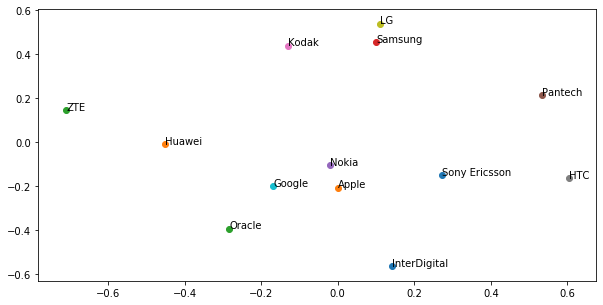

In [15]:
from sklearn.manifold import MDS #importing MDS package
mds = MDS(n_components = 2, dissimilarity='precomputed', random_state=1)
pos = mds.fit_transform(cos_dist)

labels = [i[:-4] for i in txt_glob]
plt.figure(figsize=(10,5))
for x, y, name in zip(pos[:,0], pos[:,1], labels): 
    plt.scatter(x, y)
    plt.text(x, y, name)
plt.show()

#### Heirarchical Clustering

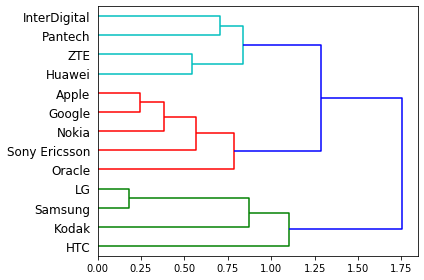

In [27]:
#importing ward and dendogram from cluster.hierarchy
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(cos_dist)#using cosine distances to deduce linkage matrix
dendrogram(linkage_matrix, orientation='right', labels = labels )#plotting dendogram with labels as the filenames
plt.tight_layout()
plt.show()

#### K Means Clustering

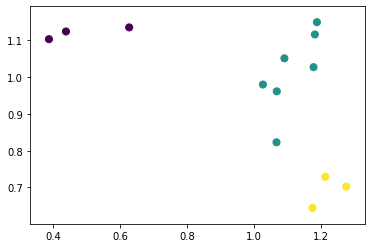

In [24]:
#importing required pakages for K means
from sklearn.cluster import KMeans
import pylab as pl
kmeans = KMeans(n_clusters=3, random_state=99) #assigning number of clusteres to 3
kmeans_2d = kmeans.fit_transform(matrix) #using fit_transform to convert
pl.figure('K-means with 3 clusters')
pl.scatter(kmeans_2d[:, 0], kmeans_2d[:, 2], s=50, c=kmeans.labels_) #plotting scatter plot
pl.show()

#### To answer the question, the three unsupervised learning techniques above namely, MDS, Heirarchical clustering and 
#### K-Means clustering yeild somewhat similar results. The patent companies appears to be closer in MDS are also 
#### appearing together for Heirarchical clustering.

### Topic Modeling

#### Latent Dirichlet Allocation - LDA

In [32]:
#importing required packages for LDA algorithm
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5, stop_words='english', max_df=0.95) #using count vectorizer for LDA
num_topics = 5 #number of topics to be 5
dtm = vectorizer.fit_transform(corpus) #Creating a documnet to term matrix

lda = LatentDirichletAllocation(n_components=num_topics, learning_method='batch', max_iter=1000, random_state=99)
document_topics = lda.fit_transform(dtm)
feature_names = vectorizer.get_feature_names()

In [33]:
def display_topics(model, feature_names, n_top_words):    
    for idx, topic in enumerate(model.components_):        
        print("Topic %d:" % (idx)," ".join([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]]))        
display_topics(lda, feature_names, 10)

Topic 0: application node object associated embodiment computer message packet database provided
Topic 1: display electrode layer substrate liquid crystal line pixel gate recording
Topic 2: image element display sensor light layer color camera electronic pixel
Topic 3: layer electrode substrate display semiconductor light line image region gate
Topic 4: antenna received message electronic said receiver packet equipment portable subscriber


#### Non-Negative Matrix Factorization

In [31]:
#impoting required packages for NMF
from sklearn import decomposition

vectorizer = TfidfVectorizer(stop_words = 'english' , min_df = 5) #using Tfidf vectorizer in NMF
dtm = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names() 
num_topics = 5 #number of topics to be 5
num_top_words = 10 #restricting topwords in each topic to be 10
model = decomposition.NMF(n_components = num_topics, random_state=99 , max_iter = 1000)
doctopic = model.fit_transform(dtm)
topic_words = []
for topic in model.components_:    
    word_idx = np.argsort(topic)[::-1][0:num_top_words]    
    topic_words.append([vocab[i] for i in word_idx])
for t in range(len(topic_words)):    
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: data method device user network second application information object includes
Topic 1: image layer electrode method second device data light display substrate
Topic 2: device second unit electronic remote host body plurality circuit portable
Topic 3: communication mobile terminal data signal method channel device information unit
Topic 4: method network service signal invention control packet data present communication


#### Latent Semantic Analysis

In [34]:
#importing required packages for LSA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD #importing truncated SVD
vectorizer1 = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True) #using count vectorizer for LSA
data_vectorized = vectorizer1.fit_transform(corpus)

def get_topics(model, vectorizer1, model_name, df,top_n = 10):
    result=[]         
    for idx, topic in enumerate(model.components_):
        topic_label = model_name + "_topic_" + str(idx)
        score = "SCORE_" + str(idx)
        aList = [(vectorizer1.get_feature_names()[i], topic[i])for i in topic.argsort()[:-top_n - 1:-1]]
        l1, l2 = zip(*aList)
        l1 = " ".join(l1)
        df[topic_label] = l1            
        df[score] = l2
        print("Topic %d:" % (idx), l1)
        if idx == 4:
            break
    

In [35]:
print("LSI being performed ...")    #Build a Latent Semantic Indexing Model 
lsi_model = TruncatedSVD(n_components=n, n_iter = 5000)
lsi_Z = lsi_model.fit_transform(data_vectorized)
print("Generating LSI Model ...")
get_topics(lsi_model, vectorizer1, "LSI",pd.DataFrame())

LSI being performed ...
Generating LSI Model ...
Topic 0: electrode light semiconductor gate pixel surface film transistor panel liquid
Topic 1: liquid crystal recording pixel electrode panel air battery optical picture
Topic 2: object file client query document element event transaction instruction web
Topic 3: element antenna frame sensor camera portable mean document color transmitter
Topic 4: color printing material sensor pixel document camera light ink print


#### To answer the question, the topics resulted from LDA, NMF and LSA are sparsely similar. The top words in
#### each topic for these three methods appeared in the topic for related methods. With more iterations and closely 
#### monetoring the data cleaning, we can achieve more similarity in those methods.